
순환 신경망으로 IMDB 리뷰 분류하기 -> 리뷰가 긍정인지 부정인지 감성을 분석

IMDB 리뷰 데이터셋: 감성분석

훈련데이터:25,000개 테스트데이터:25,000개

총 50,000개

NLP

데이터셋: 말뭉치

문장을 공백을 기준으로 분리하는 것: 토큰

he follows the cat. he loves the cat -> he, follows, the ,cat, loves:말뭉치에 나오는 고유한 단어 or 토큰의 집합(어휘 사전)

문장에서 분리된 단어 = 토큰

하나의 리뷰 샘플은 여러개의 토큰으로 구성되면 1개의 토큰은 하나의 타임스텝에 해당됨

데이터셋을 순환 신경망에 주입시

1. 원-핫 인코딩

2. 단어 임베딩

In [ ]:
from tensorflow.keras.datasets import imdb
#영어문장을 숫자로 이미 바꾸어줌

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
#500개의 단어만 사용

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [ ]:
print(len(train_input[0]))
#첫번째 샘플은 218개 토큰

218


In [ ]:
print(len(train_input[1]))
#두번째 샘플은 189개 샘플

189


In [ ]:
print(train_input[0])
#샘플의 시작 토큰은 1
#2 : 500개의 단어에 포함되지 않은 단어(어휘사전에는 없는 단어)
#샘플의 토큰이 여러개의 정수->신경망에 텍스트 자체를 전달 X
#단어마다 고유한 정수값이 부여되어 문자로 표현 가능

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20])
#긍정, 부정을 판단하는 이진분류

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [ ]:
print(np.mean(lengths), np.median(lengths))
#전체적으로 문장이 길다고 할 수 있다.

239.00925 178.0


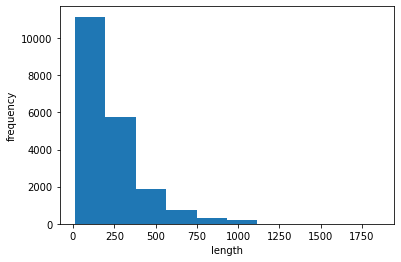

In [ ]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()
#대부분의 리뷰길이는 300미만임을 알수 있다
#어떤 리뷰는 1000개가 넘는 단어... 

시퀀스 패딩: 리뷰마다 단어의 대수가 다르기 때문에 모델을 훈련시킬때 사용하는 단어 길이를 통일시켜주어야 한다

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
#pad_sequences():단어의 개수가 100보다 작으면 샘플을 0으로 채우고, 
#100보다 큰 경우 단어를 잘라냄

In [ ]:
print(train_seq.shape)
#5000개는 검증세트로 덜어냄

(20000, 100)


In [ ]:
print(train_seq[0])
#뒤에서 100개

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:])
#첫번째 샘플의 마지막 10개
#0으로 패딩된 것이 없으므로 토큰이 100개보다 길다
#100개로 자르는 과정중 앞부분을 잘라냄
#문장의 뒷부분이 더 의미있다고 생각할수 있음

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
print(train_seq[5])
#앞부분을 0으로 패딩함

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)
#검증세트도 시퀸스 패딩 해줌

순환 신경망 모델 만들기

In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
#뉴런의 개수 8개, 100개의 토큰, 500은 빈도수가 높은 단어의 개수
model.add(keras.layers.Dense(1, activation='sigmoid'))
#이진분류 -> 시그모이드 함수, 마지막 출력층은 하나의 뉴런

원-핫 인코딩

500개의 어휘사전<해당단어에만 1로 인코딩>

하는


In [ ]:
train_oh = keras.utils.to_categorical(train_seq)
#to_categorical(): 정수배열을 입력하면 원-핫 인코딩된 배열로 반환해줌

In [ ]:
print(train_oh.shape)
#20000개의 샘플이 100개의 정수로 이루어짐
#100개의 정수마다 500크기의 배열로 원-핫 인코딩 됨 

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])
#첫번째 샘플의 첫번째 토큰
#앞에서 11번째 원소만 1이다

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))
#나머지의 원소도 모두 0인지 확인해보기 위해

1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)
#교차검증 데이터도 원-핫 인코딩 해줌

모델 구조 확인

In [ ]:
model.summary()
#simple_rnn 가중치: 500X8(완전연결)+ 8X8(은닉상태 순환) + 8(절편)
#dense 가중치: 8x1(완전연결) + 1(절편)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


순환 신경망 모델 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
#학습률 = 0.0001
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])
#옵티마이저: rmsprop, 손실값: 이진분류->'binary_crossentropy', 정확도 추가

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
#patience 3번, 최고값 저장

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])
#반복: 100, 배치크기:64, 검증세트, 체크포인트와 조기종료 추가
#훈련세트에서의 정확도: 0.81 검증세트에서의 정확도: 0.78
#입력토큰의 개수 100개, 어휘사전의 개수 500개임에도 불구하고 정확도 값은 잘 나오편이라 생각할수 있다

Epoch 1/100
313/313 [==============================] - 13s 38ms/step - loss: 0.6967 - accuracy: 0.5052 - val_loss: 0.6945 - val_accuracy: 0.5144
Epoch 2/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6900 - accuracy: 0.5285 - val_loss: 0.6877 - val_accuracy: 0.5376
Epoch 3/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6724 - accuracy: 0.5893 - val_loss: 0.6569 - val_accuracy: 0.6210
Epoch 4/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6401 - accuracy: 0.6475 - val_loss: 0.6320 - val_accuracy: 0.6586
Epoch 5/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6199 - accuracy: 0.6751 - val_loss: 0.6150 - val_accuracy: 0.6758
Epoch 6/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6009 - accuracy: 0.6967 - val_loss: 0.5966 - val_accuracy: 0.6978
Epoch 7/100
313/313 [==============================] - 11s 37ms/step - loss: 0.5788 - accuracy: 0.7222 - val_loss: 0.5789 - val_ac

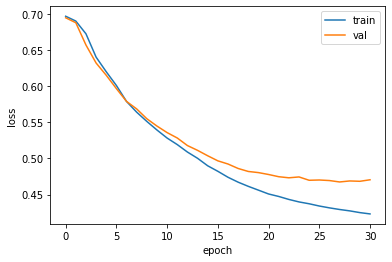

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#훈련손실은 지속저긍로 감소
#검증 손실은 20에포크 정도 에서 감소가 둔해짐(그후 조기종료)

원-핫 인코딩 : 20000X100X500 즉 입력데이터의 크기가 너무 커져서 어휘사전을 늘리기 힘들게 된다

대부분 다 0 하나의 값만 1이기 때문에 훈련의 결과가 좋지 않게 나옴

단어와 단어의 의미사이가 없다(단어사이 유사도 무시)

단어 임베딩을 사용하기

실수 값으로 벡터를 채움

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
#500개의 어휘사전, 16개의 출력차원(임베딩벡터크기), 타임스텝의 개수(시퀸스 길이, 토큰의 수):100
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()
#embedding 가중치: 500 X 16
#simple_rnn 가중치 : 16X8(완전연결) + 8X8(은닉층완전연결) + 8(절편)
#dense 가중치 : 8X1(완전연결) + 1(절편)
#simple_rnn의 가중치가 많이 작아져도 모델의 정확도가 크기 떨어지지 않음
#입력데이터의 크기를 2차원배열로 입력하여 메모리공간 효율적 사용

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
#학습률 = 0.0001
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])
#옵티마이저: rmsprop, 손실값: 이진분류->'binary_crossentropy', 정확도 추가
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
#patience 3번, 최고값 저장
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])
#반복: 100, 배치크기:64, 검증세트, 체크포인트와 조기종료 추가
#훈련세트에서의 정확도: 0.82 검증세트에서의 정확도: 0.79
#원=핫 인코딩과 비슷한 결과를 냈지만 가중치의 개수가 적고 훈련세트의 크기도 줄었다

Epoch 1/100
313/313 [==============================] - 7s 20ms/step - loss: 0.6942 - accuracy: 0.5076 - val_loss: 0.6911 - val_accuracy: 0.5358
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6908 - accuracy: 0.5293 - val_loss: 0.6896 - val_accuracy: 0.5382
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6830 - accuracy: 0.5742 - val_loss: 0.6776 - val_accuracy: 0.6040
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6683 - accuracy: 0.6316 - val_loss: 0.6622 - val_accuracy: 0.6508
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6462 - accuracy: 0.6818 - val_loss: 0.6393 - val_accuracy: 0.6920
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6215 - accuracy: 0.7187 - val_loss: 0.6213 - val_accuracy: 0.7022
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5993 - accuracy: 0.7358 - val_loss: 0.6003 - val_accuracy:

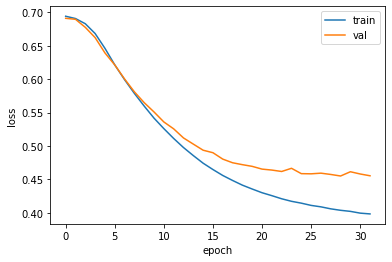

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#훈련 손실은 계속 감소
#검증손실은 지속적으로 감소하지 않아 조기 종료